# Preludio

In [3]:
library(alr3)
library(car)
library(carData)
library(model) #Acá tenemos un problema ##Lo logramos, r-cran

In [4]:
#UN1 #todo en orden.
head(UN1)

,Fertility,PPgdp
,<dbl>,<int>
Afghanistan,6.80,98
Albania,2.28,1317
Algeria,2.80,1784
Angola,7.20,739
Argentina,2.44,7163
Armenia,1.15,687


# Idea grafica

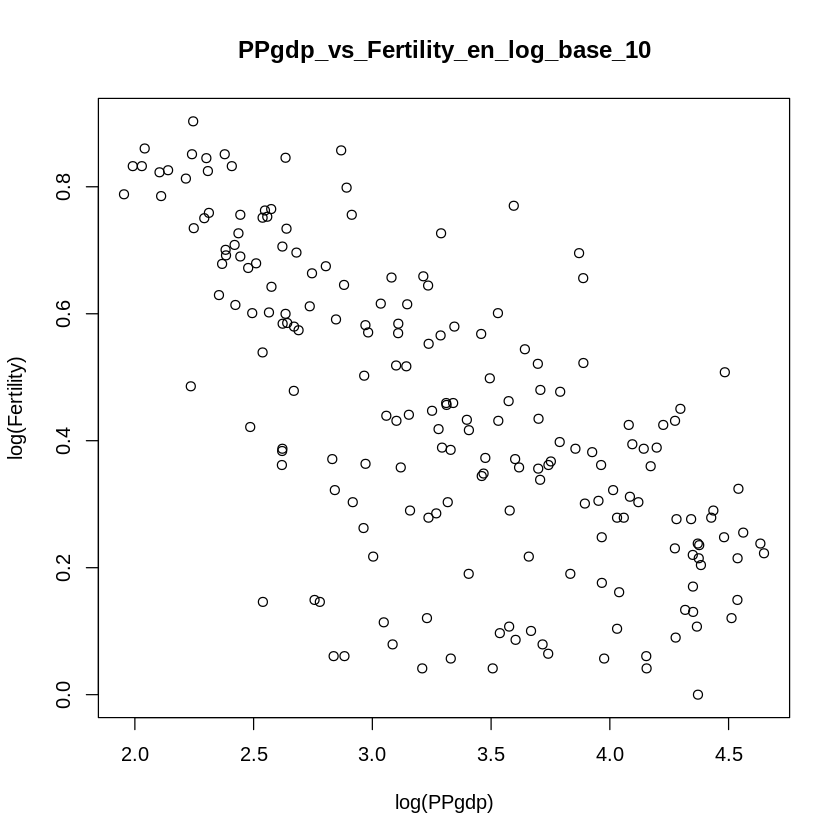

In [5]:
#Primero grafiquemos y veamos que onda.
plot(log(UN1$PPgdp,10),log(UN1$Fertility,10),xlab='log(PPgdp)', ylab='log(Fertility)', main='PPgdp_vs_Fertility_en_log_base_10') 
#Ta entera linealizable.

# Ejercicio 2.6:

## Ejercicio 2.6.1

In [6]:
regresion <- lm(Fertility ~ PPgdp, data = log(UN1,10)) #Regresión
summary(regresion)


Call:
lm(formula = Fertility ~ PPgdp, data = log(UN1, 10))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48587 -0.08148  0.03058  0.11327  0.39130 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.17399    0.05879   19.97   <2e-16 ***
PPgdp       -0.22116    0.01737  -12.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1721 on 191 degrees of freedom
Multiple R-squared:  0.4591,	Adjusted R-squared:  0.4563 
F-statistic: 162.1 on 1 and 191 DF,  p-value: < 2.2e-16


## Probando cosas: 
Esta parte es para poder trabajar más adelante con comodidad, pues son lineas que voy aprendiendo pero no es parte de algún ejercicio

In [7]:
cor(log(UN1$PPgdp,10),log(UN1$Fertility,10))^2 #Juego para obtener R2, no sé sacarlo con comandos y google me dijo que hacen esto.

[1] 0.4591472

In [8]:
coef(summary(regresion)) #Obteniendo coeficientes de manera matricial

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.173993,0.05879487,19.96761,1.224097e-48
PPgdp,-0.221160,0.01736815,-12.73366,2.731002e-27


In [9]:
coef(summary(regresion))[2,1] #Extrayendo información de la matriz.

[1] -0.22116

In [10]:
anova(regresion) #Obteniendo anova o endeva según lengua materna.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
PPgdp,1,4.800402,4.80040240,162.146,2.731002e-27
Residuals,191,5.654638,0.02960544,NA,NA


## Ejercicio 2.6.2

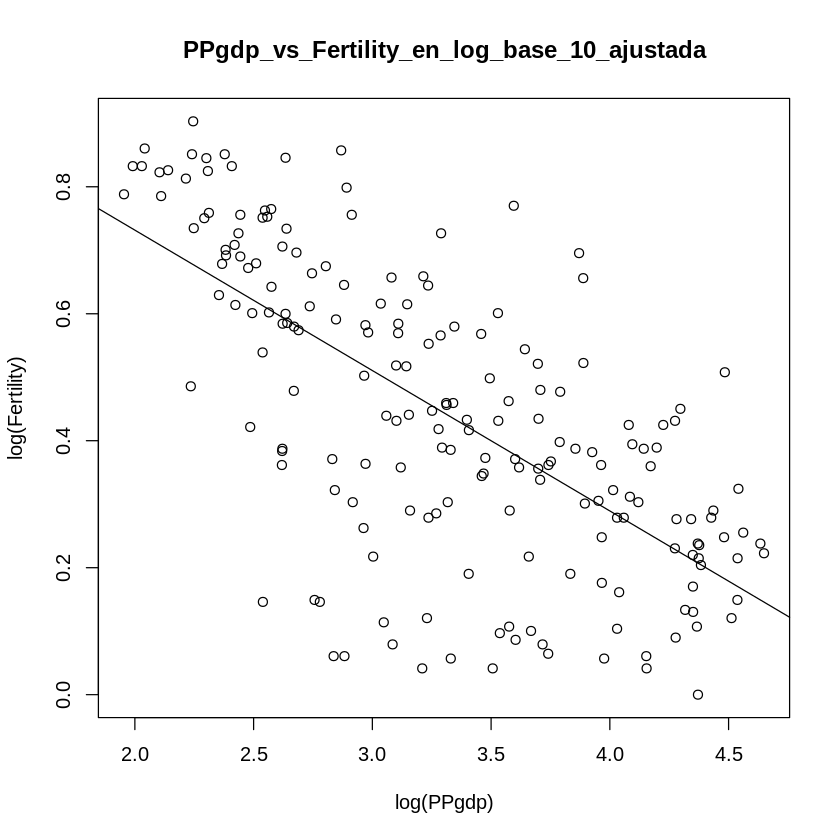

In [11]:
plot(log(UN1$PPgdp,10),log(UN1$Fertility,10),xlab='log(PPgdp)', ylab='log(Fertility)', main='PPgdp_vs_Fertility_en_log_base_10_ajustada')
abline(regresion)

## Ejercicio 2.6.3

In [12]:
beta_test(object=regresion,  alternative = "less", parm='PPgdp', ref.value=0)

       Estimate   Std.Err t value    Pr(>t)    
PPgdp -0.221160  0.017368 -12.734 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


La significancia es 2.2e-16, aunque r informa que es practicamente 0. Lo que podemos evidenciar es que el aporte de la hipotesis "la pendiente sea mayor que 0" es nulo, pues el test arroja la misma significancia que para los dos lados.

## Ejercicio 2.6.4

In [13]:
cor(log(UN1$PPgdp,10),log(UN1$Fertility,10))^2 #Obteniendo R2 a la mala

[1] 0.4591472

Esto nos dice que el 45,91% de la variabilidad esta explicada por el modelo que utilizamos.

## Ejercicio 2.6.5

In [14]:
coef(summary(regresion)) #Vuelves por aquí después de haberte conocido antes

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.173993,0.05879487,19.96761,1.224097e-48
PPgdp,-0.221160,0.01736815,-12.73366,2.731002e-27


In [15]:
beta_1<- coef(summary(regresion))[2,1]

In [16]:
ee_beta_1<- coef(summary(regresion))[2,2]  

In [17]:
beta_1+c(-1,1)*qt(.975,191)*ee_beta_1
#qt entrega el punto donde hay probabilidad acumulada .975 en una t-student con 191 grados de libertad y c(1,-1) entrega un vector 1,-1

[1] -0.255418 -0.186902

In [18]:
10^(beta_1+c(-1,1)*qt(.975,191)*ee_beta_1) 
#  Esto es un intervalo de confianza del numero que multiplicara a la fertilidad, es decir la variación de la tasa de fertilidad debería rondar entre un 55,54% y
#  un 65,03%

[1] 0.5553694 0.6502764

Esto es un intervalo de confianza del numero que multiplicara a la fertilidad, es decir la variación de la tasa de fertilidad debería rondar entre un 55,54% y un 65,03%

## Ejercicio 2.6.6


Primero veamos si nuestra muenstra cubre el punto de interes.

In [19]:
min(UN1[2])

[1] 90

In [20]:
max(UN1[2])

[1] 44579

Tenemos que el punto de interes (PPgdp=1000) pertenece al intervalo generado entre el mínimo y máximo muestral de PPgdp

In [21]:
#help(predict)
head(UN1)

,Fertility,PPgdp
,<dbl>,<int>
Afghanistan,6.80,98
Albania,2.28,1317
Algeria,2.80,1784
Angola,7.20,739
Argentina,2.44,7163
Armenia,1.15,687


Por un problema con la función predict, se tienen que hacer la regresión de una manerna distinta, por lo que crearemos una nueva regresión.

In [22]:
regresion_2 <- lm(log(Fertility,10)~log(PPgdp,10),UN1)
# summary(regresion_2) #Verificando que lo hicimos bien.

In [23]:
new.data <- data.frame(PPgdp=1000) #Creando la data que queremos predecir.

In [24]:
predict(regresion_2,new.data,interval="prediction",level=0.95)

Obteniendo que el punto predicho para log(fertility) es 0.5105 y el intervalo de confianza del 95% es (0.1701,0.8509)

In [25]:
10^(predict(regresion_2,new.data,interval="prediction",level=0.95))

,fit,lwr,upr
1,3.239759,1.479392,7.094831


Con lo anterior obtenemos que el intervalo de confianza del 95% para fertility es (1.4794,7.0948) 

## Problema 2.6.7

In [26]:
which.max(UN1$Fertility)

[1] 126

In [27]:
UN1[126:126,]

,Fertility,PPgdp
,<dbl>,<int>
Niger,8,176


La localidad con maxima tasa de fertilidad es Niger.

In [28]:
which.min(UN1$Fertility)

[1] 36

In [29]:
UN1[36:36,]

,Fertility,PPgdp
,<dbl>,<int>
Hong.Kong,1,23499


La localidad con menor tasa de fertilidad es Hong Kong

In [30]:
sort(regresion$residual)[1:2]

Armenia    Ukraine 
-0.4858735 -0.4757958

In [31]:
sort(regresion$residual)[192:193] #length(regresion$residual)=193

Oman Equatorial.Guinea 
        0.3774804         0.3913025

Las dos localidades con mayor residuo positivo son: Equatorial Guinea y Oman, respectivamente.

Mientras por otro lado, las dos localidades con mayo residuo negativo son: Armenia y Ukraine. respectivamente

## Problema 2.7.3

In [32]:
nieve <- c(23.1, 31.8, 30.4, 39.5, 52.5, 30.5, 12.4, 31.5, 27.6, 32.8, 32.0, 24.0, 24.2, 37.9, 25.1, 35.1, 21.1 )
agua <- c(10.5, 18.2, 16.3, 23.1, 24.9, 14.1, 8.8, 14.9, 16.1 , 16.7, 17.0, 10.5, 12.4, 22.8, 12.9, 17.4, 10.5)

In [33]:
data_2.6 <- data.frame(nieve, agua)
data_2.6

nieve,agua
<dbl>,<dbl>
23.1,10.5
31.8,18.2
30.4,16.3
39.5,23.1
52.5,24.9
30.5,14.1
12.4,8.8
31.5,14.9
27.6,16.1


In [34]:
regresion_2.7 <- lm(data_2.6$agua ~ 0+data_2.6$nieve) #Sin intercepto
summary(regresion_2.7)


Call:
lm(formula = data_2.6$agua ~ 0 + data_2.6$nieve)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4207 -1.4924 -0.1935  1.6515  3.0771 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
data_2.6$nieve  0.52039    0.01318   39.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.7 on 16 degrees of freedom
Multiple R-squared:  0.9898,	Adjusted R-squared:  0.9892 
F-statistic:  1559 on 1 and 16 DF,  p-value: < 2.2e-16


In [35]:
beta_1_2.7<- coef(summary(regresion_2.7))[1,1]
ee_beta_1_2.7<- coef(summary(regresion_2.7))[1,2]

In [36]:
beta_1_2.7+c(-1,1)*qt(.975,16)*ee_beta_1_2.7 

[1] 0.492451 0.548337

In [37]:
regresion_2.7_CI <- lm(data_2.6$agua ~ data_2.6$nieve) #Con intercepto
summary(regresion_2.7_CI)


Call:
lm(formula = data_2.6$agua ~ data_2.6$nieve)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1793 -1.5149 -0.3624  1.6276  3.1973 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.72538    1.54882   0.468    0.646    
data_2.6$nieve  0.49808    0.04952  10.058 4.63e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.743 on 15 degrees of freedom
Multiple R-squared:  0.8709,	Adjusted R-squared:  0.8623 
F-statistic: 101.2 on 1 and 15 DF,  p-value: 4.632e-08


Teniendose que el intervalo de confianza para beta 1 es (0.4925,0.5483), el estimador de beta 1 es 0.5204 y la varianza es 0.0002.

Por otro lado obtenemos que el valor p del intercepto es 0.646 si que tomando una significancia del 10% obtenemos que no se rechaza H0.

## Problema 2.7.4

In [48]:
length(data_2.6$agua)

[1] 17

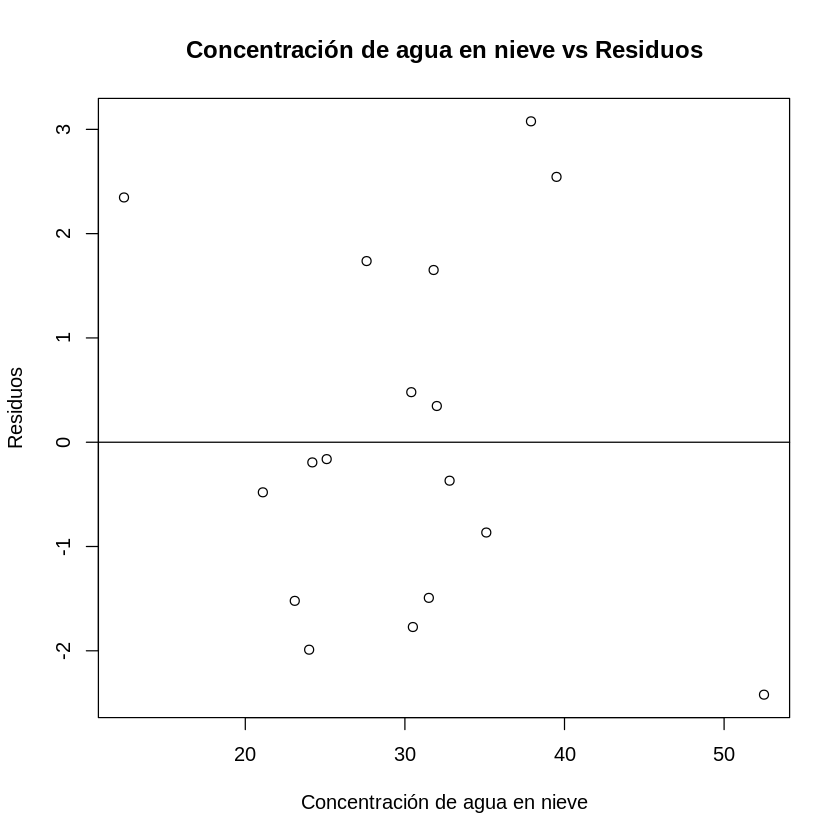

In [56]:
plot(data_2.6$nieve, regresion_2.7$residual, xlab='Concentración de agua en nieve', ylab='Residuos', main='Concentración de agua en nieve vs Residuos')
abline(h=0) #Esto debería ser lo solicitado

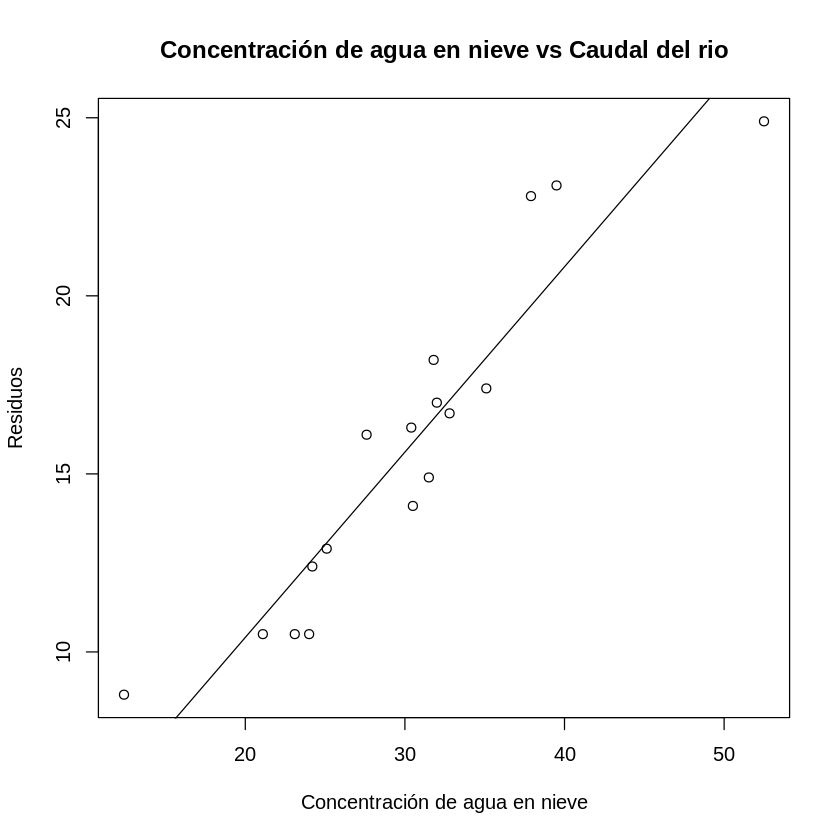

In [57]:
plot(data_2.6$nieve, data_2.6$agua, xlab='Concentración de agua en nieve', ylab='Residuos', main='Concentración de agua en nieve vs Caudal del rio') 
abline(regresion_2.7) #No lo piden, pero te da una mejor idea para decir, que wen ajuste hacemos

El ajuste parece ser bastante bueno, pues los residuos estan en el intervalo (-3,3) y hay un buen número de residuos cercanos a 0.